In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Dense, Flatten, Input
import tensorflow as tf
#Layer -> gives to create custom layer
#Dense -> fully connected layer
#Flatten -> convert multidimensional data to 1-D data

In [3]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [4]:
#3 data classes anchor, positive and negative
#Anchor data is encoded through the model
#then implement a distance layer to calculate difference between anchor and positive/negative example
#difference between anchor and positive will be close to 1. difference between anchor and negative will be 0.

#collecting negative examples
!tar -xf lfw.tgz

^C


In [ ]:
#placing the unpacked images from lfw images to data/negative folder
for dir in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',dir)):
        EX_PATH = os.path.join('lfw', dir, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [4]:
#Import uuid to generate unique names
import uuid

In [8]:
#collecting positive examples through our camera webcam
cap = cv2.VideoCapture(0) #Establishing a connection to WEBCAM, parameter is the number that is linked WEBCAM, check 0,1,2,3,4....
while cap.isOpened():
    ret, frame = cap.read() #frame is our image

    #cut down frame to 250X250 pixels
    frame = frame[80:370,280:530,:]

    #collecting anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, f'{uuid.uuid1()}.jpg')
        cv2.imwrite(imgname, frame)
        
    #collecting positive examples
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, f'{uuid.uuid1()}.jpg')
        cv2.imwrite(imgname, frame)
        
    #showing image on screen
    cv2.imshow('Image Collection', frame)
    
    #breaking gracefully
    #if you hit q , then WEBCAM closes
    if cv2.waitKey(1) & 0XFF == ord('q'): 
        break
        
cap.release() #release webcam
#Close the image show frame
cv2.destroyAllWindows()


KeyboardInterrupt



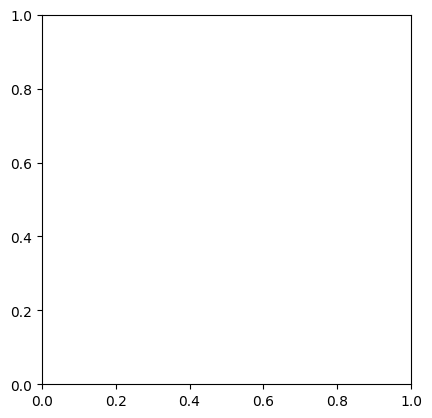

In [8]:
plt.imshow(frame[80:370,280:530,:])